# Decision Tree

## Apa itu Decision Tree?

**Decision Tree (Pohon Keputusan)** adalah salah satu algoritma *machine learning* kategori *supervised learning* yang sangat populer karena intuisinya yang mudah dipahami. Algoritma ini memodelkan data dalam struktur seperti pohon, di mana setiap *node* internal merepresentasikan "tes" pada sebuah fitur, setiap cabang merepresentasikan hasil dari tes tersebut, dan setiap *leaf node* (daun) merepresentasikan label kelas.

Tujuan utamanya adalah untuk membuat model yang dapat memprediksi nilai variabel target dengan mempelajari aturan keputusan sederhana yang diambil dari fitur data.

* **Root Node**: Node paling atas yang mewakili seluruh dataset.
* **Internal Node**: Node percabangan yang menguji sebuah fitur.
* **Leaf Node**: Node terminal yang memberikan hasil akhir (kelas).

---

## Notasi Decision Tree

Dalam konteks pohon keputusan, kita sering menggunakan notasi berikut:
* **S**: Menyatakan himpunan data (dataset).
* **A**: Mewakili sebuah atribut atau fitur (misalnya, 'Cuaca').
* **v**: Salah satu nilai yang mungkin dari atribut A (misalnya, 'Cerah').
* **$|S|$**: Jumlah sampel atau baris data dalam himpunan S.
* **$S_v$**: Subset dari S di mana atribut A memiliki nilai v.
* **$p_i$**: Proporsi dari kelas ke-i dalam sebuah himpunan data.

---

## Entropy 

**Entropy** adalah metrik yang digunakan untuk mengukur tingkat **ketidakmurnian (impurity)** atau ketidakpastian dalam sebuah himpunan data. Semakin tinggi nilai entropy, semakin tercampur label kelas di dalam himpunan data tersebut. Sesuai dengan notasi pada gambar Anda:

Rumus matematis untuk Entropy adalah:
$$ Entropy(S) = \sum_{i=1}^{k} -p_i \log_2(p_i) $$
Di mana:
* $k$ adalah jumlah total kelas.
* $p_i$ adalah proporsi sampel yang termasuk dalam kelas *i* pada himpunan data $S$.

---

## Information Gain 

**Information Gain** mengukur penurunan entropy setelah data dipisahkan berdasarkan sebuah atribut. Atribut dengan Information Gain tertinggi akan dipilih sebagai pemisah. Sesuai dengan generalisasi pada gambar Anda:

$$ Gain(S, A) = Entropy(S) - Entropy(S|A) $$

Di mana $Entropy(S|A)$ adalah entropy bersyarat (rata-rata entropy setelah dipecah oleh atribut A), yang dihitung dengan:

$$ Entropy(S|A) = \sum_{v \in \text{Values(A)}} \frac{|S_v|}{|S|} Entropy(S_v) $$
Di mana:
* $v$ adalah setiap nilai unik dari atribut A.
* $S_v$ adalah subset data di mana atribut A memiliki nilai $v$.
* $Entropy(S_v)$ adalah entropy dari subset $S_v$.

# 1. Perhitungan Manual: Entropy dan Information Gain

## Dataset Contoh

Kita akan menggunakan dataset sederhana yang sama: 15 baris, 2 fitur (`Cuaca`, `Suhu`), dan 3 kelas target (`Aktivitas`).

| Cuaca | Suhu | Aktivitas |
| :--- | :--- | :--- |
| Cerah | Panas | Olahraga |
| Cerah | Panas | Olahraga |
| Cerah | Normal | Olahraga |
| Cerah | Dingin | Santai |
| Cerah | Normal | Santai |
| Mendung | Panas | Kerja |
| Mendung | Normal | Kerja |
| Mendung | Dingin | Kerja |
| Mendung | Panas | Santai |
| Hujan | Normal | Santai |
| Hujan | Dingin | Santai |
| Hujan | Dingin | Kerja |
| Hujan | Normal | Kerja |
| Hujan | Normal | Kerja |
| Hujan | Dingin | Santai |

**Distribusi Kelas (Total 15 data):**
* **Olahraga**: 3 ($p_1 = 3/15 = 0.2$)
* **Santai**: 6 ($p_2 = 6/15 = 0.4$)
* **Kerja**: 6 ($p_3 = 6/15 = 0.4$)

---

## Langkah 1: Hitung Entropy Awal (Entropy(S))

$$ Entropy(S) = - (0.2 \cdot \log_2(0.2)) - (0.4 \cdot \log_2(0.4)) - (0.4 \cdot \log_2(0.4)) $$
$$ Entropy(S) = - (0.2 \cdot -2.3219) - (0.4 \cdot -1.3219) - (0.4 \cdot -1.3219) $$
$$ Entropy(S) = 0.4644 + 0.5288 + 0.5288 = \mathbf{1.522} $$

---

## Langkah 2: Hitung Information Gain untuk Setiap Fitur

### A. Information Gain untuk Fitur `Cuaca`
Entropy bersyarat untuk `Cuaca`, $Entropy(S|\text{Cuaca})$:
* $Entropy(\text{Cerah}) = -(\frac{2}{5}\log_2\frac{2}{5}) - (\frac{3}{5}\log_2\frac{3}{5}) = 0.971$
* $Entropy(\text{Mendung}) = -(\frac{1}{4}\log_2\frac{1}{4}) - (\frac{3}{4}\log_2\frac{3}{4}) = 0.811$
* $Entropy(\text{Hujan}) = -(\frac{3}{6}\log_2\frac{3}{6}) - (\frac{3}{6}\log_2\frac{3}{6}) = 1.0$

$$ Entropy(S|\text{Cuaca}) = \left(\frac{5}{15} \cdot 0.971\right) + \left(\frac{4}{15} \cdot 0.811\right) + \left(\frac{6}{15} \cdot 1.0\right) $$
$$ Entropy(S|\text{Cuaca}) = 0.324 + 0.216 + 0.4 = 0.940 $$
$$ Gain(S, \text{Cuaca}) = Entropy(S) - Entropy(S|\text{Cuaca}) = 1.522 - 0.940 = \mathbf{0.582} $$

### B. Information Gain untuk Fitur `Suhu`
Entropy bersyarat untuk `Suhu`, $Entropy(S|\text{Suhu})$:
* $Entropy(\text{Panas}) = -(\frac{2}{4}\log_2\frac{2}{4}) - (\frac{1}{4}\log_2\frac{1}{4}) - (\frac{1}{4}\log_2\frac{1}{4}) = 1.5$
* $Entropy(\text{Normal}) = -(\frac{1}{5}\log_2\frac{1}{5}) - (\frac{2}{5}\log_2\frac{2}{5}) - (\frac{2}{5}\log_2\frac{2}{5}) = 1.522$
* $Entropy(\text{Dingin}) = -(\frac{3}{6}\log_2\frac{3}{6}) - (\frac{3}{6}\log_2\frac{3}{6}) = 1.0$

$$ Entropy(S|\text{Suhu}) = \left(\frac{4}{15} \cdot 1.5\right) + \left(\frac{5}{15} \cdot 1.522\right) + \left(\frac{6}{15} \cdot 1.0\right) $$
$$ Entropy(S|\text{Suhu}) = 0.400 + 0.507 + 0.4 = 1.307 $$
$$ Gain(S, \text{Suhu}) = Entropy(S) - Entropy(S|\text{Suhu}) = 1.522 - 1.307 = \mathbf{0.215} $$

---

## Kesimpulan Perhitungan Manual

Information Gain `Cuaca` (0.582) lebih tinggi daripada Information Gain `Suhu` (0.215). Oleh karena itu, fitur **`Cuaca`** akan dipilih sebagai **root node**.

## 2. Perhitungan Menggunakan Python

In [18]:
%pip install scikit-learn matplotlib pandas graphviz -q
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
import warnings

# Mengabaikan warning yang mungkin muncul
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


## Membuat DataFrame berdasarkan data contoh

In [19]:
data = {
    'Cuaca': ['Cerah', 'Cerah', 'Cerah', 'Cerah', 'Cerah', 'Mendung', 'Mendung', 'Mendung', 'Mendung', 'Hujan', 'Hujan', 'Hujan', 'Hujan', 'Hujan', 'Hujan'],
    'Suhu': ['Panas', 'Panas', 'Normal', 'Dingin', 'Normal', 'Panas', 'Normal', 'Dingin', 'Panas', 'Normal', 'Dingin', 'Dingin', 'Normal', 'Normal', 'Dingin'],
    'Aktivitas': ['Olahraga', 'Olahraga', 'Olahraga', 'Santai', 'Santai', 'Kerja', 'Kerja', 'Kerja', 'Santai', 'Santai', 'Santai', 'Kerja', 'Kerja', 'Kerja', 'Santai']
}
df = pd.DataFrame(data)

## PREPROCESSING: Mengubah data kategorikal menjadi numerik

In [20]:
encoders = {}
df_encoded = pd.DataFrame()

print("--- Mapping Fitur Kategorikal ke Numerik ---")
for col in ['Cuaca', 'Suhu', 'Aktivitas']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    encoders[col] = le
    # Menampilkan mapping untuk kejelasan
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Mapping untuk '{col}': {mapping}")

--- Mapping Fitur Kategorikal ke Numerik ---
Mapping untuk 'Cuaca': {'Cerah': np.int64(0), 'Hujan': np.int64(1), 'Mendung': np.int64(2)}
Mapping untuk 'Suhu': {'Dingin': np.int64(0), 'Normal': np.int64(1), 'Panas': np.int64(2)}
Mapping untuk 'Aktivitas': {'Kerja': np.int64(0), 'Olahraga': np.int64(1), 'Santai': np.int64(2)}


## TRAINING: Melatih model Decision Tree

In [21]:
# Memisahkan fitur (X) dan target (y)
X = df_encoded[['Cuaca', 'Suhu']]
y = df_encoded['Aktivitas']

# Membuat dan melatih model Decision Tree
# Menggunakan 'entropy' sebagai kriteria agar sesuai dengan perhitungan manual
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X, y)
print("\nModel Decision Tree berhasil dilatih!")


Model Decision Tree berhasil dilatih!


## VISUALISASI: Membuat plot pohon keputusan


--- Membuat Visualisasi Plot Pohon Keputusan ---


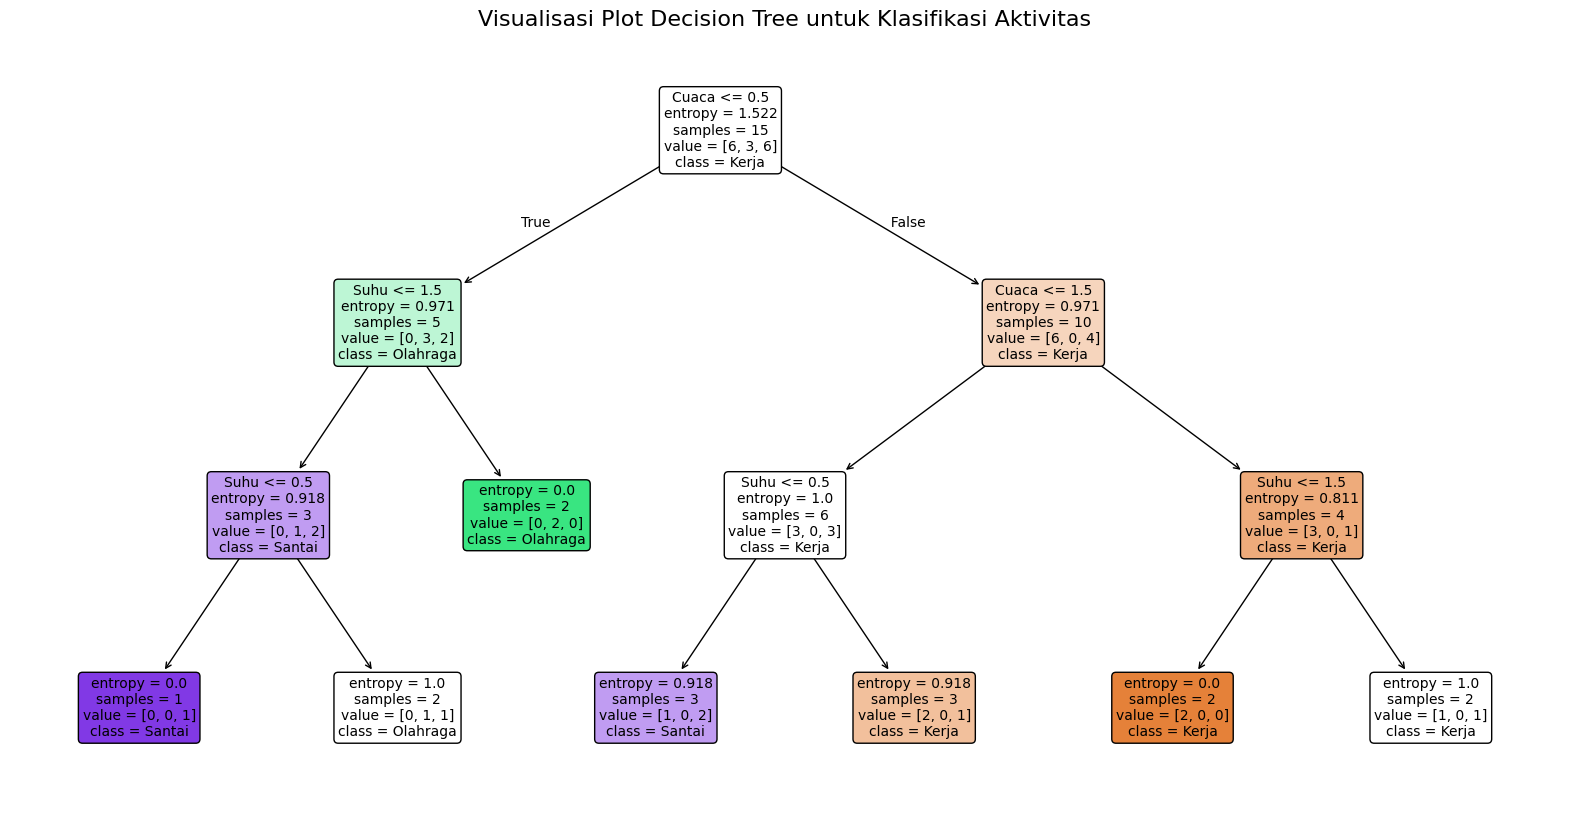

In [22]:
print("\n--- Membuat Visualisasi Plot Pohon Keputusan ---")

# Menyiapkan nama fitur dan nama kelas untuk plot
feature_names = ['Cuaca', 'Suhu']
class_names = list(encoders['Aktivitas'].classes_)

# Menentukan ukuran plot
plt.figure(figsize=(20, 10))

# Menggunakan plot_tree untuk membuat visualisasi
plot_tree(dt_classifier,
            feature_names=feature_names,
            class_names=class_names,
            filled=True,
            rounded=True,
            fontsize=10)

plt.title("Visualisasi Plot Decision Tree untuk Klasifikasi Aktivitas", fontsize=16)
plt.show()

## RULE & TESTING: Menampilkan aturan dan menguji data baru

In [26]:
# Menghasilkan aturan (rules) dari pohon dalam format teks
tree_rules = export_text(dt_classifier, feature_names=feature_names)
print("\n--- Aturan Keputusan (Rules) ---")
print(tree_rules)

# Membuat 2 data baru untuk diuji
print("\n--- Pengujian dengan Data Baru ---")
data_baru = pd.DataFrame({
    'Cuaca': ['Cerah', 'Hujan'],
    'Suhu': ['Normal', 'Panas']
})

# Menggunakan encoder yang sudah ada untuk mentransformasi data baru
X_baru = pd.DataFrame()
X_baru['Cuaca'] = encoders['Cuaca'].transform(data_baru['Cuaca'])
X_baru['Suhu'] = encoders['Suhu'].transform(data_baru['Suhu'])

# Melakukan prediksi
prediksi_encoded = dt_classifier.predict(X_baru)
prediksi_aktual = encoders['Aktivitas'].inverse_transform(prediksi_encoded)

data_baru['Prediksi Aktivitas'] = prediksi_aktual
print(data_baru)


--- Aturan Keputusan (Rules) ---
|--- Cuaca <= 0.50
|   |--- Suhu <= 1.50
|   |   |--- Suhu <= 0.50
|   |   |   |--- class: 2
|   |   |--- Suhu >  0.50
|   |   |   |--- class: 1
|   |--- Suhu >  1.50
|   |   |--- class: 1
|--- Cuaca >  0.50
|   |--- Cuaca <= 1.50
|   |   |--- Suhu <= 0.50
|   |   |   |--- class: 2
|   |   |--- Suhu >  0.50
|   |   |   |--- class: 0
|   |--- Cuaca >  1.50
|   |   |--- Suhu <= 1.50
|   |   |   |--- class: 0
|   |   |--- Suhu >  1.50
|   |   |   |--- class: 0


--- Pengujian dengan Data Baru ---
   Cuaca    Suhu Prediksi Aktivitas
0  Cerah  Normal           Olahraga
1  Hujan   Panas              Kerja


## Perbandingan Hasil Manual vs. Kode `sklearn`

* **Hasil Manual**: Berdasarkan perhitungan `Gain(S, A)`, kita menyimpulkan bahwa **`Cuaca`** adalah fitur pemisah terbaik untuk *root node* karena memiliki Information Gain tertinggi (0.582).

* **Hasil `sklearn`**: Pohon yang divisualisasikan oleh `sklearn` juga menempatkan **`Cuaca`** sebagai *root node*. Kondisi pemisahannya adalah `Cuaca <= 0.5`. Berdasarkan mapping *encoding* (`Cerah`: 0), ini berarti model memisahkan data menjadi dua kelompok besar: `{Cerah}` dan `{Mendung, Hujan}`.

**Kesimpulan**: Hasil dari perhitungan manual kita **konsisten** dengan langkah pertama yang diambil oleh algoritma `DecisionTreeClassifier` dari `sklearn`. Keduanya setuju bahwa `Cuaca` adalah fitur paling informatif untuk memulai klasifikasi.

---

## Analisis Hasil Uji Data Baru

1.  **Data Uji 1: (Cuaca = Cerah, Suhu = Normal)**
    * **Encoding**: `Cuaca=0`, `Suhu=2`
    * **Path Aturan**:
        1.  `Cuaca <= 0.5` (Benar, karena 0 <= 0.5) -> Pindah ke cabang kiri.
        2.  `Suhu <= 1.0` (Salah, karena 2 > 1.0) -> Pindah ke cabang kanan.
        3.  Node ini adalah *leaf node* dengan kelas **Olahraga**.
    * **Hasil Prediksi**: `Olahraga`. Ini adalah prediksi yang logis berdasarkan data training.

2.  **Data Uji 2: (Cuaca = Hujan, Suhu = Panas)**
    * **Encoding**: `Cuaca=1`, `Suhu=2` (Mapping: Hujan=1, Panas=2)
    * **Path Aturan**:
        1.  `Cuaca <= 0.5` (Salah, karena 1 > 0.5) -> Pindah ke cabang kanan.
        2.  `Cuaca <= 1.5` (Benar, karena 1 <= 1.5) -> Pindah ke cabang kiri.
        3.  `Suhu <= 0.5` (Salah, karena 2 > 0.5) -> Pindah ke cabang kanan.
        4.  Node ini adalah *leaf node* dengan kelas **Kerja**.
    * **Hasil Prediksi**: `Kerja`. Model melakukan ekstrapolasi karena kombinasi (Hujan, Panas) tidak ada di data training asli, namun ia tetap bisa memberikan prediksi berdasarkan aturan yang telah dipelajari.